In [1]:
import json 
import requests


In [34]:
import pandas as pd
from io import StringIO
import os
# Path to your file
path = r":\Users\admin\OneDrive\Desktop\AIOps_project20\AIops_projectaya\967911_1.csv"

# Check if file exists
print("Checking if file exists:", os.path.exists(path))
try:
    # Read the file content
    with open(path, "r", encoding="utf-8", errors="replace") as f:
        content = f.read()

    # Read CSV content into DataFrame
    df = pd.read_csv(StringIO(content), on_bad_lines='skip', low_memory=False)

    # Show all column names
    print("\n:receipt: Columns in your CSV file:\n")
    for col in df.columns:
        print("-", col)
        
    # Show first few rows
    print("\n:bar_chart: Sample data:\n")
    print(df.head())
except Exception as e:
    print(":x: Failed to read the file:", e)

Checking if file exists: False
:x: Failed to read the file: [Errno 22] Invalid argument: ':\\Users\\admin\\OneDrive\\Desktop\\AIOps_project20\\AIops_projectaya\\967911_1.csv'


In [35]:
df

,id,address,apiURLs,assessedValues,brokers,buildingName,city,companies,congressionalDistrictHouse,country,...,propertyType,province,reviews,rules,subdivision,sourceURLs,statuses,taxID,transactions,yearBuilt
0,AWPNEGLVyCk2Bpf62NA8,506 Haverhill Ln,NaN,"[{""year"":2012,""totalAmount"":179874.0},{""year"":...","[{""agent"":""Lisa Saraceno"",""company"":""Charles R...",NaN,Safety Harbor,NaN,112.0,US,...,Single Family Dwelling,FL,NaN,NaN,Georgetown East,https://us-street.api.smartystreets.com/street...,"[{""date"":""2017-09-06T00:00:00.000Z"",""dateSeen""...",34-28-16-30655-000-0850,"[{""saleDate"":""2017-09-06T00:00:00.000Z"",""price...",1988.0
1,Uhm2tJQByN4LkFz_IM9U,2503 Paula,NaN,NaN,"[{""agent"":""Adrian Petrila"",""company"":""Exp Real...",NaN,Lehigh Acres,NaN,NaN,US,...,Single Family Dwelling,FL,NaN,NaN,LEHIGH ACRES,https://www.landwatch.com/api/Property/getview...,"[{""date"":""2025-01-24T12:31:37.397Z"",""dateSeen""...",NaN,NaN,1991.0
2,AWmR-lNJAXxH_fqQOH4N,5320 Forest Park Dr,NaN,"[{""year"":2024,""totalAmount"":116892.0}]","[{""agent"":""Judy Lucarelli"",""company"":""Era Righ...",NaN,North Fort Myers,NaN,93.0,US,...,Single Family Dwelling,FL,NaN,NaN,Forest Park Mobile Home,https://www.estately.com/listings/info/5320-fo...,"[{""date"":""2019-09-09T00:00:00.000Z"",""dateSeen""...",36-43-24-11-0000B.0220,"[{""saleDate"":""1986-06-01T07:00:00.000Z"",""price...",1976.0
3,AXAVcgn8hcmU2WcKEZbO,4450 58th Ave N,NaN,"[{""year"":2012,""totalAmount"":46612.0},{""year"":2...",NaN,NaN,Saint Petersburg,NaN,NaN,US,...,Single Family Dwelling,FL,NaN,NaN,HIGHLAND GROVES,https://us-street.api.smartystreets.com/street...,"[{""date"":""2022-03-20T00:00:00.000Z"",""dateSeen""...",NaN,"[{""saleDate"":""1994-08-26T00:00:00.000Z"",""docum...",1951.0
4,BX6ssJEBoOD0_HX2rsM-,NaN,NaN,NaN,NaN,NaN,Sereď,NaN,NaN,SK,...,NaN,Trnavský kraj,NaN,NaN,NaN,https://www.airbnb.com/rooms/1233190982187450095,"[{""date"":""2024-09-02T02:59:50.516Z"",""dateSeen""...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AWsY3H15_K9P-Csy7Vd_,29 W Riverside Rd,NaN,"[{""year"":2023,""totalAmount"":672500.0,""landAmou...","[{""agent"":""Jamie Sathers Day"",""company"":""Js Re...",NaN,Esko,NaN,NaN,US,...,Single Family Dwelling,MN,NaN,NaN,Esko On Midway,https://www.land.com/property/29-w-riverside-r...,"[{""date"":""2025-01-31T00:00:00.000Z"",""dateSeen""...",78-190-0120,"[{""saleDate"":""2011-08-22T00:00:00.000Z"",""price...",2005.0
96,MDMLbXoBhBhNBLFcH-ef,44 Bell St,NaN,NaN,"[{""agent"":""Rachel Gannon"",""company"":""Local Roo...",NaN,Dayton,NaN,315.0,US,...,Single Family Dwelling,OH,NaN,NaN,City/Dayton Rev,https://www.redfin.com/OH/Dayton/44-Bell-St-45...,"[{""date"":""2025-06-11T00:00:00.000Z"",""dateSeen""...",R72-02202-0061,"[{""saleDate"":""2020-01-23T00:00:00.000Z"",""price...",1919.0
97,rj20U5EBFopjzThkMJ-C,309 1ST AVE S,NaN,"[{""year"":2012,""totalAmount"":919692.0},{""year"":...",NaN,NaN,TIERRA VERDE,NaN,89.0,US,...,Single Family Dwelling,FL,NaN,NaN,Tierra Verde Unit One,https://www.pcpao.gov/property-details?s=16322...,"[{""date"":""2024-07-29T00:00:00.000Z"",""dateSeen""...",20-32-16-90846-045-0300,"[{""saleDate"":""2014-01-03T00:00:00.000Z"",""docum...",2001.0
98,aQMKA5MByN4LkFz_f_74,3068 Reed Ave,NaN,NaN,"[{""agent"":""James Bowers"",""company"":""Coldwell B...",NaN,Cheyenne,NaN,NaN,US,...,Single Family Dwelling,WY,NaN,NaN,NaN,https://www.remax.com/wy/cheyenne/home-details...,"[{""date"":""2025-06-25T00:00:00.000Z"",""dateSeen""...",NaN,"[{""saleDate"":""2005-10-24T07:00:00.000Z""},{""sal...",1951.0


In [36]:
df.columns


Index(['id', 'address', 'apiURLs', 'assessedValues', 'brokers', 'buildingName',
       'city', 'companies', 'congressionalDistrictHouse', 'country',
       ...
       'propertyType', 'province', 'reviews', 'rules', 'subdivision',
       'sourceURLs', 'statuses', 'taxID', 'transactions', 'yearBuilt'],
      dtype='object', length=102)

In [37]:
df.index


RangeIndex(start=0, stop=100, step=1)

In [38]:

import pandas as pd
import json

def clean_datafiniti(df):
    def extract_price(transactions):
        try:
            if pd.isna(transactions):
                return None
            if isinstance(transactions, str):
                transactions = json.loads(transactions.replace("'", "\""))
            if isinstance(transactions, list) and len(transactions) > 0:
                return transactions[0].get("price") or transactions[0].get("priceAmount") or transactions[0].get("amount")
        except:
            return None

    df['price'] = df['transactions'].apply(extract_price)

    df['yearBuilt'] = pd.to_numeric(df['yearBuilt'], errors='coerce').fillna(0).astype(int)

    df_cleaned = df.rename(columns={
        'address': 'address',
        'city': 'city',
        'province': 'province',
        'country': 'country'
    })

    selected_cols = ['address', 'city', 'province', 'country', 'yearBuilt', 'price']
    df_cleaned = df_cleaned[selected_cols]

    df_cleaned = df_cleaned.dropna(subset=['address', 'city', 'price'])

    print("Cleaned Datafiniti DataFrame shape:", df_cleaned.shape)
    return df_cleaned

In [39]:
df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\AIOps_project20\AIops_projectaya\967911_1.csv")
df_clean = clean_datafiniti(df)

# save cleaned DataFrame to CSV
df_clean.to_csv("datafiniti_cleaned.csv", index=False)
print("Saved cleaned Datafiniti data to datafiniti_cleaned.csv")

Cleaned Datafiniti DataFrame shape: (64, 6)
Saved cleaned Datafiniti data to datafiniti_cleaned.csv


In [40]:
df_clean = clean_datafiniti(df)
df_clean.head()

Cleaned Datafiniti DataFrame shape: (64, 6)


,address,city,province,country,yearBuilt,price
0,506 Haverhill Ln,Safety Harbor,FL,US,1988,342500.0
2,5320 Forest Park Dr,North Fort Myers,FL,US,1976,37000.0
3,4450 58th Ave N,Saint Petersburg,FL,US,1951,28000.0
9,780 Hanbury Dr,Des Plaines,IL,US,2006,222000.0
10,707 HANBURY DR,DES PLAINES,IL,US,2005,125000.0


In [41]:
df_clean.index


Index([ 0,  2,  3,  9, 10, 15, 16, 19, 20, 21, 23, 24, 26, 27, 29, 30, 31, 32,
       33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 50, 52, 54, 55, 57, 58, 59,
       61, 63, 65, 66, 67, 70, 72, 74, 75, 77, 78, 79, 81, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 94, 95, 96, 97, 99],
      dtype='int64')

In [ ]:
import requests
import pandas as pd

# ATTOM API setup
base_url = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/address"
headers = {
    "accept": "application/json",
    "apikey": "c7c1d9b704152889c64c0e7967f0cc8b		"
}

# Fetch 5 pages × 100 = 500 rows
all_properties = []
pages_to_fetch = 5
pagesize = 100

for page in range(1, pages_to_fetch + 1):
    params = {
        "postalcode": "82009",  # Valid ZIP code (Cheyenne, WY)
        "page": str(page),
        "pagesize": str(pagesize)
    }

    response = requests.get(base_url, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        properties = data.get("property", [])
        if isinstance(properties, list):
            all_properties.extend(properties)
        else:
            all_properties.append(properties)
        print(f"Page {page} fetched: {len(properties)} records")
    else:
        print(f"Page {page} failed - Status {response.status_code}")
        print(response.text)
        break  # Stop if any page fails

# Convert to DataFrame
if all_properties:
    df = pd.json_normalize(all_properties, sep='_')
    df.to_csv("attom_raw.csv", index=False)
    print(f"\nTotal rows saved: {len(df)} to attom_raw.csv")
    display(df.head())
else:
    print("No data fetched.")

Page 1 fetched: 100 records
Page 2 fetched: 100 records
Page 3 fetched: 100 records
Page 4 fetched: 100 records
Page 5 fetched: 100 records

Total rows saved: 500 to attom_raw.csv


,identifier_Id,identifier_fips,identifier_apn,identifier_attomId,address_country,address_countrySubd,address_line1,address_line2,address_locality,address_matchCode,...,location_geoid,location_geoIdV4_CO,location_geoIdV4_CS,location_geoIdV4_DB,location_geoIdV4_N4,location_geoIdV4_PL,location_geoIdV4_SB,location_geoIdV4_ZI,vintage_lastModified,vintage_pubDate
0,180053,56021,16885000400010,180053,US,WY,4009 CARLA DR,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,22b24a91277613b572bb847840bad23d,802b98230660b6ebebd36a06ec9e541e,"5b88c062457fc7330a81dec74b026e41, 2adc253f6a97...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
1,228520,56021,18015000247070,228520,US,WY,4707 HICKORY PL,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,ac4725a7497f492cc0bda6e12e09ed2d,802b98230660b6ebebd36a06ec9e541e,"9ef520046d8a93b1b5320e8b9f7dcf2f, 5b88c062457f...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
2,239936,56021,11054000400170,239936,US,WY,252 E IDAHO ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, RS00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 13e2c61b7838...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
3,240202,56021,11054000900012,240202,US,WY,9420 MICHIGAN ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, SB00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
4,263622,56021,13923000600141,263622,US,WY,4717 MORAN AVE,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,5c0988930d223ac4d02a8c930641c123,802b98230660b6ebebd36a06ec9e541e,"9ef520046d8a93b1b5320e8b9f7dcf2f, 5b88c062457f...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22


In [43]:
df

,identifier_Id,identifier_fips,identifier_apn,identifier_attomId,address_country,address_countrySubd,address_line1,address_line2,address_locality,address_matchCode,...,location_geoid,location_geoIdV4_CO,location_geoIdV4_CS,location_geoIdV4_DB,location_geoIdV4_N4,location_geoIdV4_PL,location_geoIdV4_SB,location_geoIdV4_ZI,vintage_lastModified,vintage_pubDate
0,180053,56021,16885000400010,180053,US,WY,4009 CARLA DR,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,22b24a91277613b572bb847840bad23d,802b98230660b6ebebd36a06ec9e541e,"5b88c062457fc7330a81dec74b026e41, 2adc253f6a97...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
1,228520,56021,18015000247070,228520,US,WY,4707 HICKORY PL,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,ac4725a7497f492cc0bda6e12e09ed2d,802b98230660b6ebebd36a06ec9e541e,"9ef520046d8a93b1b5320e8b9f7dcf2f, 5b88c062457f...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
2,239936,56021,11054000400170,239936,US,WY,252 E IDAHO ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, RS00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 13e2c61b7838...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
3,240202,56021,11054000900012,240202,US,WY,9420 MICHIGAN ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, SB00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
4,263622,56021,13923000600141,263622,US,WY,4717 MORAN AVE,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,5c0988930d223ac4d02a8c930641c123,802b98230660b6ebebd36a06ec9e541e,"9ef520046d8a93b1b5320e8b9f7dcf2f, 5b88c062457f...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8828243,56021,18265000100160,8828243,US,WY,400 E CARLSON ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,079e8e8fabf45c64bfbf5db0d878a7eb,802b98230660b6ebebd36a06ec9e541e,"13e2c61b7838e57ac1998bbff557d090, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
496,8828258,56021,12364000200050,8828258,US,WY,4801 MOUNTAIN RD,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, SB00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,e43b630f809ae2cd918a8ed63d15966d,802b98230660b6ebebd36a06ec9e541e,"5b88c062457fc7330a81dec74b026e41, 2adc253f6a97...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
497,8828259,56021,12364000200010,8828259,US,WY,4800 KING ARTHUR WAY,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,e43b630f809ae2cd918a8ed63d15966d,802b98230660b6ebebd36a06ec9e541e,"5b88c062457fc7330a81dec74b026e41, 26c640f6b716...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
498,8828260,56021,12364000100010,8828260,US,WY,4801 KING ARTHUR WAY,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8f

In [44]:
df.columns

Index(['identifier_Id', 'identifier_fips', 'identifier_apn',
       'identifier_attomId', 'address_country', 'address_countrySubd',
       'address_line1', 'address_line2', 'address_locality',
       'address_matchCode', 'address_oneLine', 'address_postal1',
       'address_postal2', 'address_postal3', 'location_accuracy',
       'location_latitude', 'location_longitude', 'location_distance',
       'location_geoid', 'location_geoIdV4_CO', 'location_geoIdV4_CS',
       'location_geoIdV4_DB', 'location_geoIdV4_N4', 'location_geoIdV4_PL',
       'location_geoIdV4_SB', 'location_geoIdV4_ZI', 'vintage_lastModified',
       'vintage_pubDate'],
      dtype='object')

In [45]:
import requests
import pandas as pd

url = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/address"
headers = {
    "accept": "application/json",
    "apikey": "c7c1d9b704152889c64c0e7967f0cc8b		"
}
params = {
    "postalcode": "82009",
    "page": "1",
    "pagesize": "50"
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    print("API Success")
    data = response.json()
    properties = data.get("property", [])
    
    if not properties:
        print("No property data found in response.")
    else:
        df_attom_raw = pd.json_normalize(properties, sep="_")

        def clean_attom(df):
            df_cleaned = df.rename(columns={
                'address_line1': 'address',
                'address_locality': 'city',
                'address_countrySubd': 'province',
                'address_country': 'country',
                'building_yearBuilt': 'yearBuilt'
            })

            if 'yearBuilt' not in df_cleaned.columns:
                df_cleaned['yearBuilt'] = None

            df_cleaned['price'] = None

            selected_cols = ['address', 'city', 'province', 'country', 'yearBuilt', 'price']
            df_cleaned = df_cleaned[selected_cols]
            df_cleaned = df_cleaned.dropna(subset=['address', 'city'])
            df_cleaned['yearBuilt'] = pd.to_numeric(df_cleaned['yearBuilt'], errors='coerce').fillna(0).astype(int)

            return df_cleaned

        df_attom_clean = clean_attom(df_attom_raw)
        print("Cleaned Data:")
        print(df_attom_clean)
else:
    print("Failed to fetch data from Attom API:", response.status_code)
    print(response.text)

API Success
Cleaned Data:
                 address      city province country  yearBuilt price
0          4009 CARLA DR  CHEYENNE       WY      US          0  None
1        4707 HICKORY PL  CHEYENNE       WY      US          0  None
2         252 E IDAHO ST  CHEYENNE       WY      US          0  None
3       9420 MICHIGAN ST  CHEYENNE       WY      US          0  None
4         4717 MORAN AVE  CHEYENNE       WY      US          0  None
5       4701 ONTARIO AVE  CHEYENNE       WY      US          0  None
6    6901 WILLSHIRE BLVD  CHEYENNE       WY      US          0  None
7         4755 MORAN AVE  CHEYENNE       WY      US          0  None
8          729 APACHE ST  CHEYENNE       WY      US          0  None
9    7812 YELLOWSTONE RD  CHEYENNE       WY      US          0  None
10     1442 GILCHRIST RD  CHEYENNE       WY      US          0  None
11        4756 MORAN AVE  CHEYENNE       WY      US          0  None
12   1767 POWDERHOUSE RD  CHEYENNE       WY      US          0  None
13   132

In [46]:
import pandas as pd
import json

def clean_datafiniti(df):
    def extract_price(transactions):
        try:
            if pd.isna(transactions):
                return None
            if isinstance(transactions, str):
                transactions = json.loads(transactions.replace("'", "\""))
            if isinstance(transactions, list) and len(transactions) > 0:
                return transactions[0].get("price") or transactions[0].get("priceAmount") or transactions[0].get("amount")
        except:
            return None

    df['price'] = df['transactions'].apply(extract_price)
    df['yearBuilt'] = pd.to_numeric(df['yearBuilt'], errors='coerce').fillna(0).astype(int)

    df_cleaned = df.rename(columns={
        'address': 'address',
        'city': 'city',
        'province': 'province',
        'country': 'country'
    })

    selected_cols = ['address', 'city', 'province', 'country', 'yearBuilt', 'price']
    df_cleaned = df_cleaned[selected_cols]
    df_cleaned = df_cleaned.dropna(subset=['address', 'city', 'price'])

    return df_cleaned

def clean_attom(df):
    df_cleaned = df.rename(columns={
        'address_line1': 'address',
        'address_locality': 'city',
        'address_countrySubd': 'province',
        'address_country': 'country',
        'building_yearBuilt': 'yearBuilt'
    })

    if 'yearBuilt' not in df_cleaned.columns:
        df_cleaned['yearBuilt'] = None

    df_cleaned['price'] = None

    selected_cols = ['address', 'city', 'province', 'country', 'yearBuilt', 'price']
    df_cleaned = df_cleaned[selected_cols]
    df_cleaned = df_cleaned.dropna(subset=['address', 'city'])
    df_cleaned['yearBuilt'] = pd.to_numeric(df_cleaned['yearBuilt'], errors='coerce').fillna(0).astype(int)

    return df_cleaned

In [47]:
df_datafiniti_raw = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\AIOps_project20\AIops_projectaya\967911_1.csv", low_memory=False)

In [48]:
df_merged = pd.concat([
    clean_datafiniti(df_datafiniti_raw),
    clean_attom(df_attom_raw)
], ignore_index=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_19644\565954061.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_merged = pd.concat([


In [49]:
print("Merged shape:", df_merged.shape)
print(df_merged.head(10))

df_merged.to_csv("merged_real_estate.csv", index=False)

df_merged

Merged shape: (114, 6)
               address              city province country  yearBuilt     price
0     506 Haverhill Ln     Safety Harbor       FL      US       1988  342500.0
1  5320 Forest Park Dr  North Fort Myers       FL      US       1976   37000.0
2      4450 58th Ave N  Saint Petersburg       FL      US       1951   28000.0
3       780 Hanbury Dr       Des Plaines       IL      US       2006  222000.0
4       707 HANBURY DR       DES PLAINES       IL      US       2005  125000.0
5      7782 Dutch Loop  Colorado Springs       CO      US       2013  299500.0
6         1163 Fay Ave             Largo       FL      US       1963     100.0
7          204 Roat St      Lehigh Acres       FL      US       1995   13900.0
8       201 Telfair Ct       Summerville       SC      US       1983  190000.0
9     453 Seaworthy Rd  North Fort Myers       FL      US       1991  261000.0


,address,city,province,country,yearBuilt,price
0,506 Haverhill Ln,Safety Harbor,FL,US,1988,342500.0
1,5320 Forest Park Dr,North Fort Myers,FL,US,1976,37000.0
2,4450 58th Ave N,Saint Petersburg,FL,US,1951,28000.0
3,780 Hanbury Dr,Des Plaines,IL,US,2006,222000.0
4,707 HANBURY DR,DES PLAINES,IL,US,2005,125000.0
...,...,...,...,...,...,...
109,2308 PATTISON AVE,CHEYENNE,WY,US,0,NaN
110,2312 APACHE ST,CHEYENNE,WY,US,0,NaN
111,5201 TEN SLEEP DR,CHEYENNE,WY,US,0,NaN
112,5110 KING ARTHUR WAY,CHEYENNE,WY,US,0,NaN


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\AIOps_project20\AIops_projectaya\967911_1.csv")
print("Loaded data. Shape:", df.shape)

Loaded data. Shape: (100, 102)


In [ ]:
df.columns = df.columns.str.strip().str.lower()  #
print(df.columns) 


Index(['id', 'address', 'apiurls', 'assessedvalues', 'brokers', 'buildingname',
       'city', 'companies', 'congressionaldistricthouse', 'country',
       ...
       'propertytype', 'province', 'reviews', 'rules', 'subdivision',
       'sourceurls', 'statuses', 'taxid', 'transactions', 'yearbuilt'],
      dtype='object', length=102)


In [54]:
import pandas as pd
import numpy as np


print(df.columns)  


if "price" not in df.columns:
    df["price"] = np.random.randint(100000, 500000, size=len(df))


df = df.dropna(subset=["price"])


Index(['id', 'address', 'apiurls', 'assessedvalues', 'brokers', 'buildingname',
       'city', 'companies', 'congressionaldistricthouse', 'country',
       ...
       'propertytype', 'province', 'reviews', 'rules', 'subdivision',
       'sourceurls', 'statuses', 'taxid', 'transactions', 'yearbuilt'],
      dtype='object', length=102)


In [61]:
# Assuming df has already been loaded earlier
import numpy as np

# Add 'price' column if missing
if "price" not in df.columns:
    df["price"] = np.random.randint(100000, 500000, size=len(df))

# Show updated DataFrame
df.head()


,id,address,apiurls,assessedvalues,brokers,buildingname,city,companies,congressionaldistricthouse,country,...,province,reviews,rules,subdivision,sourceurls,statuses,taxid,transactions,yearbuilt,price
0,AWPNEGLVyCk2Bpf62NA8,506 Haverhill Ln,NaN,"[{""year"":2012,""totalAmount"":179874.0},{""year"":...","[{""agent"":""Lisa Saraceno"",""company"":""Charles R...",NaN,Safety Harbor,NaN,112.0,US,...,FL,NaN,NaN,Georgetown East,https://us-street.api.smartystreets.com/street...,"[{""date"":""2017-09-06T00:00:00.000Z"",""dateSeen""...",34-28-16-30655-000-0850,"[{""saleDate"":""2017-09-06T00:00:00.000Z"",""price...",1988.0,54411
1,Uhm2tJQByN4LkFz_IM9U,2503 Paula,NaN,NaN,"[{""agent"":""Adrian Petrila"",""company"":""Exp Real...",NaN,Lehigh Acres,NaN,NaN,US,...,FL,NaN,NaN,LEHIGH ACRES,https://www.landwatch.com/api/Property/getview...,"[{""date"":""2025-01-24T12:31:37.397Z"",""dateSeen""...",NaN,NaN,1991.0,453122
2,AWmR-lNJAXxH_fqQOH4N,5320 Forest Park Dr,NaN,"[{""year"":2024,""totalAmount"":116892.0}]","[{""agent"":""Judy Lucarelli"",""company"":""Era Righ...",NaN,North Fort Myers,NaN,93.0,US,...,FL,NaN,NaN,Forest Park Mobile Home,https://www.estately.com/listings/info/5320-fo...,"[{""date"":""2019-09-09T00:00:00.000Z"",""dateSeen""...",36-43-24-11-0000B.0220,"[{""saleDate"":""1986-06-01T07:00:00.000Z"",""price...",1976.0,293502
3,AXAVcgn8hcmU2WcKEZbO,4450 58th Ave N,NaN,"[{""year"":2012,""totalAmount"":46612.0},{""year"":2...",NaN,NaN,Saint Petersburg,NaN,NaN,US,...,FL,NaN,NaN,HIGHLAND GROVES,https://us-street.api.smartystreets.com/street...,"[{""date"":""2022-03-20T00:00:00.000Z"",""dateSeen""...",NaN,"[{""saleDate"":""1994-08-26T00:00:00.000Z"",""docum...",1951.0,409010
4,BX6ssJEBoOD0_HX2rsM-,NaN,NaN,NaN,NaN,NaN,Sereď,NaN,NaN,SK,...,Trnavský kraj,NaN,NaN,NaN,https://www.airbnb.com/rooms/1233190982187450095,"[{""date"":""2024-09-02T02:59:50.516Z"",""dateSeen""...",NaN,NaN,NaN,340733


In [ ]:
import pandas as pd


df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\AIOps_project20\AIops_projectaya\967911_1.csv")


In [63]:
import numpy as np


if "price" not in df.columns:
    df["price"] = np.random.randint(100000, 500000, size=len(df))


print(df.head())


                     id              address  apiURLs  \
0  AWPNEGLVyCk2Bpf62NA8     506 Haverhill Ln      NaN   
1  Uhm2tJQByN4LkFz_IM9U           2503 Paula      NaN   
2  AWmR-lNJAXxH_fqQOH4N  5320 Forest Park Dr      NaN   
3  AXAVcgn8hcmU2WcKEZbO      4450 58th Ave N      NaN   
4  BX6ssJEBoOD0_HX2rsM-                  NaN      NaN   

                                      assessedValues  \
0  [{"year":2012,"totalAmount":179874.0},{"year":...   
1                                                NaN   
2             [{"year":2024,"totalAmount":116892.0}]   
3  [{"year":2012,"totalAmount":46612.0},{"year":2...   
4                                                NaN   

                                             brokers buildingName  \
0  [{"agent":"Lisa Saraceno","company":"Charles R...          NaN   
1  [{"agent":"Adrian Petrila","company":"Exp Real...          NaN   
2  [{"agent":"Judy Lucarelli","company":"Era Righ...          NaN   
3                                           

In [64]:
df = df.dropna(subset=["yearBuilt", "price"])
df["yearBuilt"] = df["yearBuilt"].astype(int)


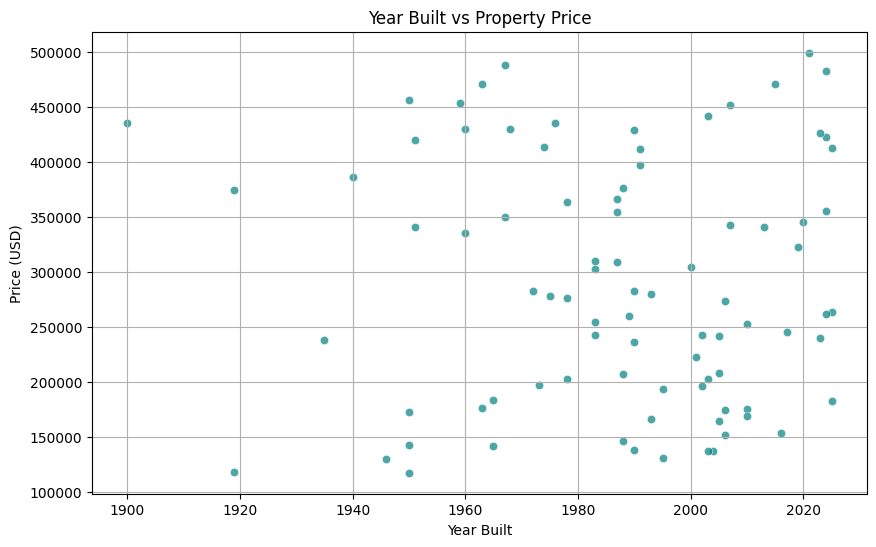

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x="yearBuilt", y="price", data=df, alpha=0.7, color='teal')
plt.title("Year Built vs Property Price")
plt.xlabel("Year Built")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


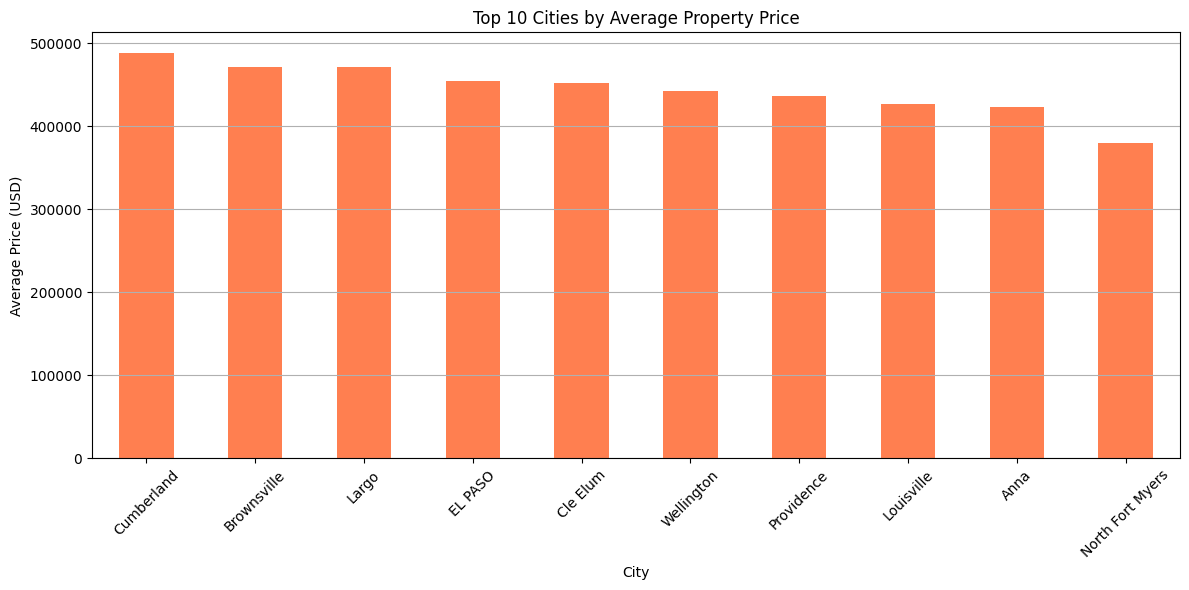

In [66]:
# Get average price per city
city_avg = df.groupby("city")["price"].mean().sort_values(ascending=False).head(10)

# Bar plot of average price by city
plt.figure(figsize=(12, 6))
city_avg.plot(kind="bar", color="coral")
plt.title("Top 10 Cities by Average Property Price")
plt.ylabel("Average Price (USD)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [72]:
print(X_train.select_dtypes(include=['object']).columns.tolist())


['assessedValues', 'country', 'county', 'currentOwnerType', 'dateAdded', 'dateUpdated', 'deposits', 'descriptions', 'domains', 'estimatedPrices', 'features', 'fees', 'floorSizeUnit', 'geoLocation', 'imageURLs', 'instrumentNumber', 'keys', 'languagesSpoken', 'leasingTerms', 'legalDescription', 'legalRange', 'listingName', 'lotSizeUnit', 'managedBy', 'mostRecentBrokerAgent', 'mostRecentBrokerCompany', 'mostRecentBrokerEmails', 'mostRecentBrokerPhones', 'mostRecentBrokerDateSeen', 'mostRecentPriceDomain.1', 'mostRecentPriceSourceURL.1', 'mostRecentPriceDate.1', 'mostRecentPriceFirstDateSeen.1', 'mostRecentRentalPricePeriod', 'mostRecentRentalPriceDomain', 'mostRecentRentalPriceDate', 'mostRecentRentalPriceFirstDateSeen', 'mostRecentEstimatedPriceDomain', 'mostRecentEstimatedPriceDate', 'mostRecentEstimatedPriceFirstDateSeen', 'mostRecentStatus', 'mostRecentStatusDate', 'mostRecentStatusFirstDateSeen', 'mlsNumber', 'neighborhoods', 'parking', 'people', 'petPolicy', 'postalCode', 'prices', 

In [73]:
print(X_train[X_train.select_dtypes(include=['object']).columns].head())


                                       assessedValues country  \
65  [{"year":2019,"totalAmount":424861.0,"landAmou...      US   
85                                                NaN      US   
21                                                NaN      US   
40  [{"year":2012,"totalAmount":842033.0},{"year":...      US   
51  [{"year":2025,"totalAmount":44000.0,"landAmoun...      US   

               county currentOwnerType             dateAdded  \
65  Palm Beach County       Individual  2020-01-06T14:01:08Z   
85          Fairfield              NaN  2021-06-20T02:02:07Z   
21         Lee County              NaN  2020-05-12T17:52:22Z   
40    Pinellas County              NaN  2024-02-01T15:53:48Z   
51               cook       Individual  2023-06-30T20:18:00Z   

             dateUpdated                                           deposits  \
65  2025-07-23T10:13:01Z  [{"amount":3400.0,"currency":"USD","dateSeen":...   
85  2025-07-23T10:13:01Z                                          

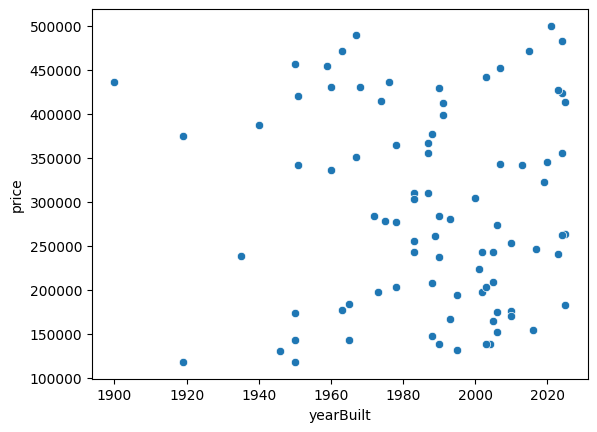

ValueError: Could not interpret value `bedrooms` for `x`. An entry with this name does not appear in `data`.

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='yearBuilt', y='price', data=df)
plt.show()

sns.boxplot(x='bedrooms', y='price', data=df)
plt.show()


In [79]:
df_filtered = df[(df['price'] > 10000) & (df['price'] < 1000000)]


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# تنظيف الداتا (خلي الأعمدة المهمة فقط)
df_simple = df.dropna(subset=['yearBuilt', 'price'])
df_simple['yearBuilt'] = df_simple['yearBuilt'].astype(int)

X = df_simple[['yearBuilt']]
y = df_simple['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R² score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


R² score: -0.0108
MSE: 8681813785.17


Mean Squared Error: 8681813785.17
R² Score: -0.0108


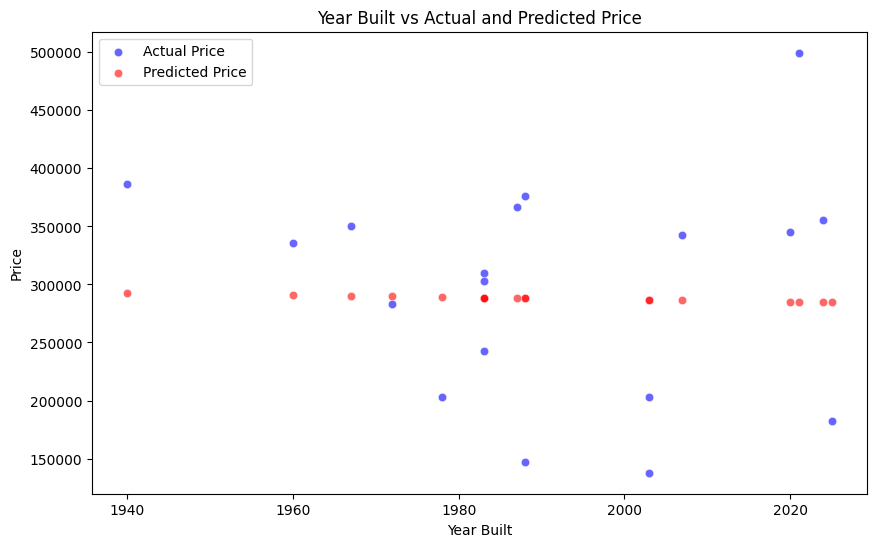

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# تنظيف البيانات (استبعاد الصفوف الناقصة)
df_clean = df.dropna(subset=['yearBuilt', 'price'])
df_clean['yearBuilt'] = df_clean['yearBuilt'].astype(int)

# اختيار الميزات والهدف
X = df_clean[['yearBuilt']]
y = df_clean['price']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب نموذج الانحدار الخطي
model = LinearRegression()
model.fit(X_train, y_train)

# التوقع على بيانات الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج (حتى لو كان سالب)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

# رسم العلاقة بين سنة البناء والسعر (بيانات الاختبار)
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['yearBuilt'], y=y_test, label='Actual Price', color='blue', alpha=0.6)
sns.scatterplot(x=X_test['yearBuilt'], y=y_pred, label='Predicted Price', color='red', alpha=0.6)
plt.title("Year Built vs Actual and Predicted Price")
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.legend()
plt.show()


Linear Regression Performance:
  MSE: 8681813785.17
  R²: -0.0108

Random Forest Performance:
  MSE: 13408558190.11
  R²: -0.5612


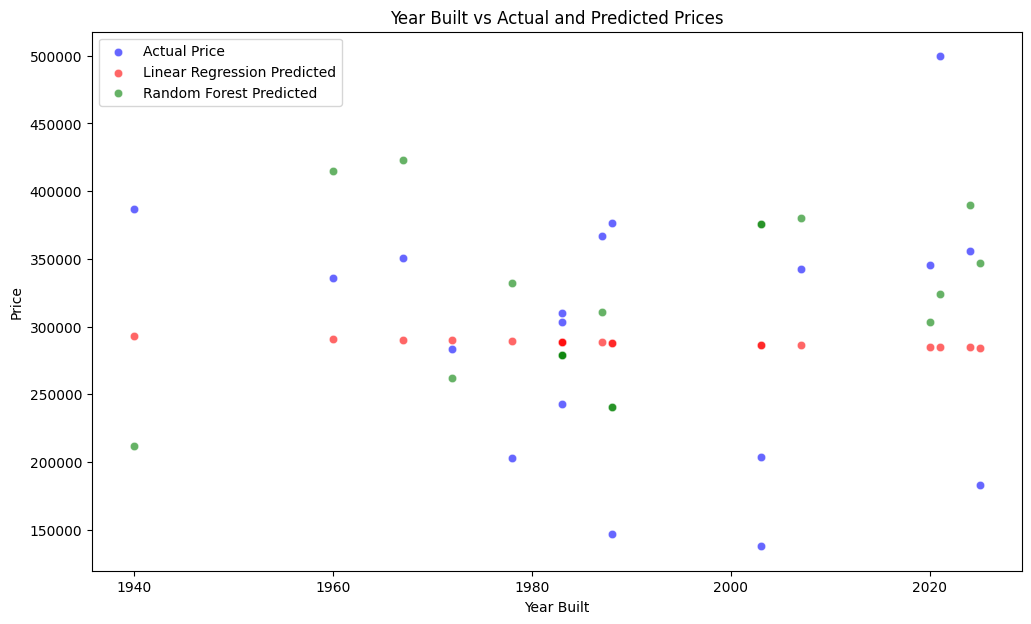

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# تنظيف البيانات (حذف الصفوف الناقصة)
df_clean = df.dropna(subset=['yearBuilt', 'price'])
df_clean['yearBuilt'] = df_clean['yearBuilt'].astype(int)

# اختيار المتغيرات والهدف
X = df_clean[['yearBuilt']]
y = df_clean['price']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- تدريب Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Performance:")
print(f"  MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"  R²: {r2_score(y_test, y_pred_lr):.4f}")

# --- تدريب Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print(f"  MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"  R²: {r2_score(y_test, y_pred_rf):.4f}")

# --- رسم النتائج ---
plt.figure(figsize=(12, 7))
sns.scatterplot(x=X_test['yearBuilt'], y=y_test, label='Actual Price', color='blue', alpha=0.6)
sns.scatterplot(x=X_test['yearBuilt'], y=y_pred_lr, label='Linear Regression Predicted', color='red', alpha=0.6)
sns.scatterplot(x=X_test['yearBuilt'], y=y_pred_rf, label='Random Forest Predicted', color='green', alpha=0.6)
plt.title("Year Built vs Actual and Predicted Prices")
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.legend()
plt.show()


In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R² on train set:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

# تقييم على بيانات الاختبار
y_pred_best = best_rf.predict(X_test)
print(f"Test R²: {r2_score(y_test, y_pred_best):.4f}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}
Best R² on train set: -0.14745116172422912
Test R²: 0.0300


In [86]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in feat_imp:
    print(f"{feature}: {importance:.4f}")


Feature Importances:
yearBuilt: 1.0000


Linear Regression Performance:
Mean Squared Error: 8681813785.17
R² Score: -0.0108


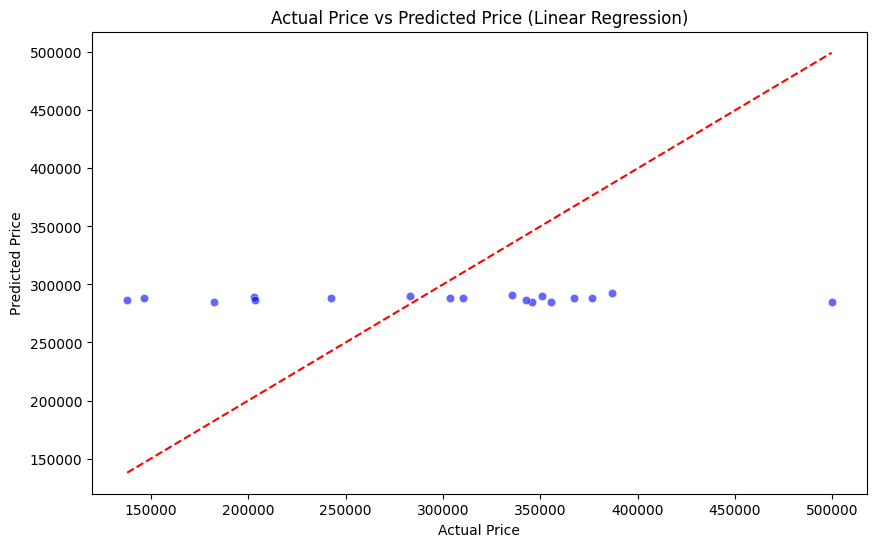

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# نفترض X_train, X_test, y_train, y_test جاهزين من قبل

# تدريب Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# التنبؤ
y_pred_lr = lr_model.predict(X_test)

# التقييم
print("Linear Regression Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")

# رسم السعر الحقيقي مقابل السعر المتوقع
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط y=x
plt.title('Actual Price vs Predicted Price (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


Decision Tree Performance:
  MSE: 18265322882.79
  R²: -1.1266

Gradient Boosting Performance:
  MSE: 13701364000.35
  R²: -0.5953


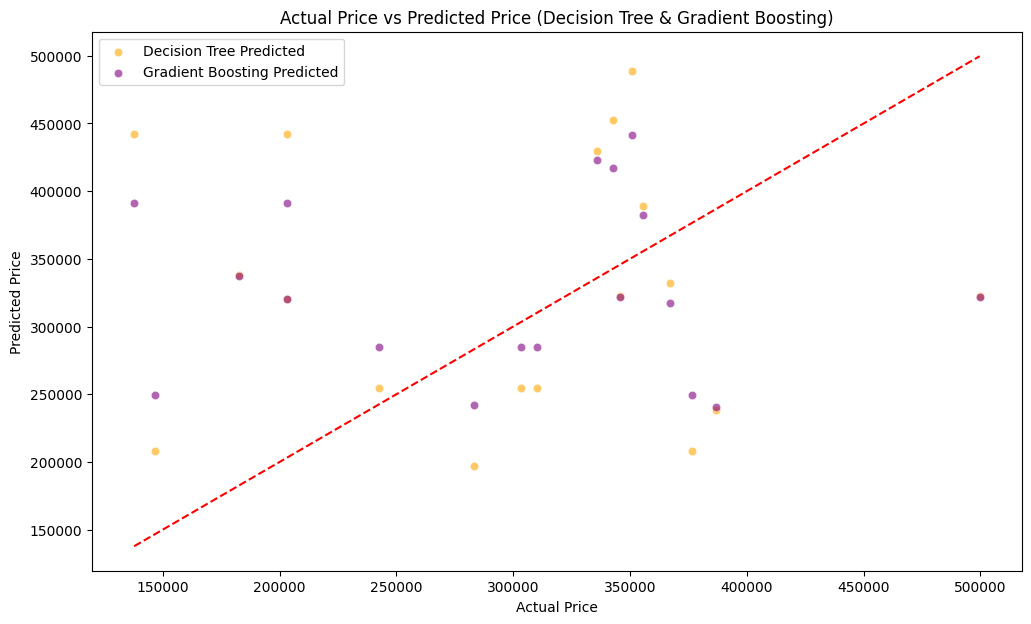

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# نفترض X_train, X_test, y_train, y_test جاهزين من قبل

# تدريب Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Performance:")
print(f"  MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"  R²: {r2_score(y_test, y_pred_dt):.4f}")

# تدريب Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Performance:")
print(f"  MSE: {mean_squared_error(y_test, y_pred_gb):.2f}")
print(f"  R²: {r2_score(y_test, y_pred_gb):.4f}")

# رسم النتائج للمقارنة
plt.figure(figsize=(12,7))
sns.scatterplot(x=y_test, y=y_pred_dt, label='Decision Tree Predicted', color='orange', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_gb, label='Gradient Boosting Predicted', color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual Price vs Predicted Price (Decision Tree & Gradient Boosting)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()
